# Problem Context
---

You are a data professional in a data analytics firm, called Automatidata. The company's newest client, the New York City Taxi & Limousine Commission (New York City TLC) requested a detailed statistical analysis of payment type. That is, do the customers who use a credit card pay higher fare amounts than those who use cash? 

That said, the TLC team is asking us to consider the following: 

- The relationship between fare amount and payment type. 


- Test the hypothesis that customers who use a credit card pay higher fare amounts.


- Should you conclude that there is a statistically significant relationship between credit card payment and fare amount, discuss what the next steps should be: what are your thoughts on strategies our team could implement to encourage customers to pay with credit card?


# Project goal
---
The main purpose of this project is to 
Sample and analyze data to discover whether there is a relationship between payment type and total fare amount. For example: discover if customers who use credit cards pay higher total fare amounts than customers who use cash. Strategies can be made based on the result in order to find ways to generate more revenue for New York City taxi cab drivers.

# Data source
---
https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

Remark: For the purpose of this project, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 

1.  customers who are required to pay with credit card
2.  customers who are required to pay with cash

Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

# Analyzing data using PACE process:
---

- **Plan**: conceptualize the scope of the project and develop the steps that will guide you through the process of completing a project.


- **Analyze**: collect, prepare, and analyze all of the data for your project.


- **Construct**: build models that will allow you access to hidden relationships locked within data.


- **Execute**: present the finding of your analysis, receive feedback, and make revisions as necessary.

# PACE: Plan stage
---
- What is the project goal?
- Who are the project stakeholders?
- What are stakeholder's requirements?
- What is the scope of the project?
- What is the workflow to sucessfully perform this project?

## Data Import

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
data = pd.read_csv('./Data/2017_Yellow_Taxi_Trip_Data.csv')

In [163]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


# PACE: Analyze stage
---

- EDA
- Data cleaning
- Identify relationship between dependent and independent vairables

## 1. EDA

- Categorical variables: `RatecodeID, store_and_fwd_flag, payment_type, extra, mta_tax`


- Numerical variables: `passenger_count, trip_distance, fare_amount, tip_amount, tolls_amount, improvement_surcharge, total_amount`


- Date-time variables: `tpep_pickup_datetime, tpep_dropoff_datetime`

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [165]:
# change tpep_pickup_datetime and tpep_dropoff_datetime to date-time data type
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [166]:
data.describe(include = 'all')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2017-10-17 10:54:24,2017-10-18 20:07:45,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2017-01-01 00:08:25,2017-01-01 00:17:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000


In [167]:
data.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [168]:
# Data Cleaning : Identify and handle missing values
for i in data.columns:
    total = data[i].isna().sum()
    if total > 0:
        print(f'"{i}" has missing values: {round(total, 2)} ~ {round(total*100/data.shape[0], 2)}%')
    else:
        print(f'"{i}" has no missing values')

"Unnamed: 0" has no missing values
"VendorID" has no missing values
"tpep_pickup_datetime" has no missing values
"tpep_dropoff_datetime" has no missing values
"passenger_count" has no missing values
"trip_distance" has no missing values
"RatecodeID" has no missing values
"store_and_fwd_flag" has no missing values
"PULocationID" has no missing values
"DOLocationID" has no missing values
"payment_type" has no missing values
"fare_amount" has no missing values
"extra" has no missing values
"mta_tax" has no missing values
"tip_amount" has no missing values
"tolls_amount" has no missing values
"improvement_surcharge" has no missing values
"total_amount" has no missing values


Data have no missing values

In [169]:
# Data Cleaning : Identify and handle duplicates
data.duplicated().sum()

0

Data have no duplicates

In [170]:
data.shape

(22699, 18)

### 1.1 Categorical variables exploration

In [171]:
# create function for data visualization
def plot(df, feat_lst, output, n_rows, n_cols, plot_type):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(n_cols*3.5, n_rows*3.5))
    for r in range(n_rows):
        for c in range(n_cols):
            i = r*n_cols + c
            if i < len(feat_lst):
                ax_i = ax[r, c]
                if plot_type == 'countplot':
                    sns.countplot(data = df, x=feat_lst[i], hue=output, ax = ax_i, palette = 'muted')
                    ax_i.legend(title = '', loc='upper right')
                elif plot_type == 'histplot':
                    sns.histplot(data = df, x=feat_lst[i], hue=output, ax=ax_i, kde=True, bins=10, palette = 'viridis')
                else:
                    sns.boxplot(data=df, x=feat_lst[i], ax=ax_i, palette = 'pastel')
                ax_i.set_title(f"Figure {i+1}: {feat_lst[i]}", fontsize = 18)
                plt.setp(ax_i.get_xticklabels(), rotation=45, fontsize=13)
                ax_i.set_xlabel(feat_lst[i], fontsize=15)
    
    if (n_rows * n_cols) > len(feat_lst):
        for k in range((n_rows*n_cols) - len(feat_lst)):
            ax.flat[-(k+1)].set_visible(False)
    
    plt.tight_layout()
    plt.show();

In [172]:
category_cols = ['RatecodeID', 'store_and_fwd_flag', 'payment_type', 'extra', 'mta_tax']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


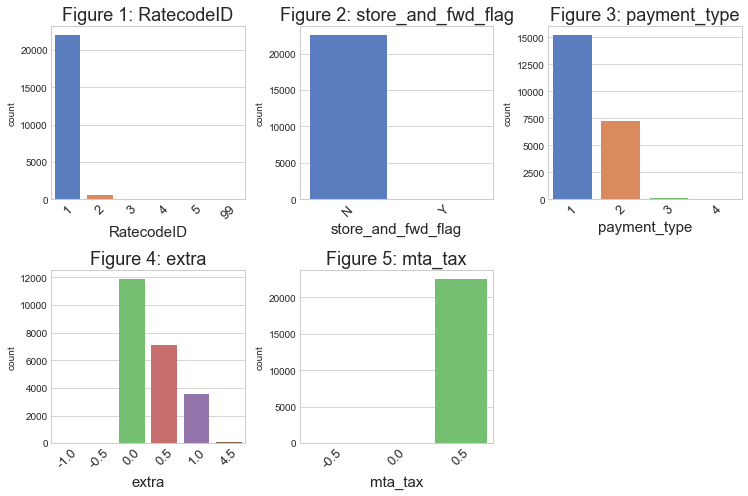

In [173]:
plot(df = data, feat_lst = category_cols, output = None, n_rows = 2, n_cols = 3, plot_type = 'countplot')

- *RatecodeID*: has inconsistent value of 99 
- *store_and_fwd_flag*: most of observations were held in vehicle memory before being sent to the vendor
- *payment_type*: most customers paid by credit card and cash. It's also notable that customers from the dataset only have 4 payment type while the metadata show there were 6 types.
- *extra* : the column has inconsistent values and needed to be removed. Most of customers used the service during regular transportanting condition, followed by rush hour and overnight service.
- *mta_tax* : there're also inconsistent data point and need cleaning

In [174]:
# Data Cleaning : handle inconsistent data points
data['RatecodeID'] = data.loc[data['RatecodeID'] != 99]['RatecodeID']
data['extra'] = data.loc[data['extra'].isin([0.0, 0.5, 1.0])]['extra']
data['mta_tax'] = data.loc[~ (data['mta_tax'] == -0.5)]['mta_tax']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


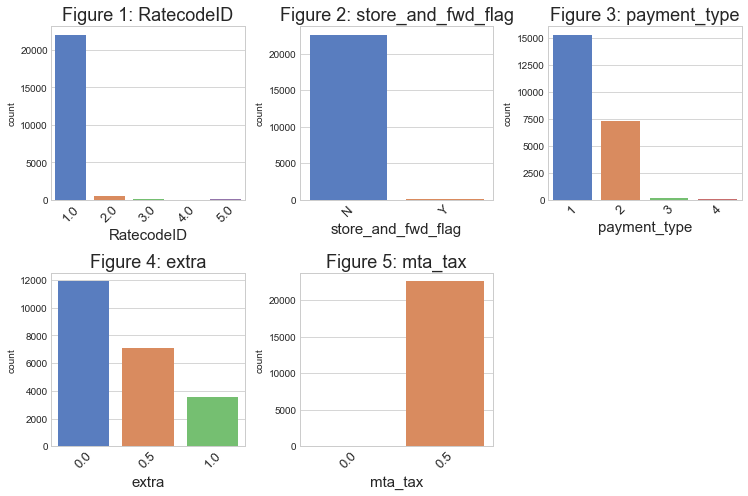

In [175]:
# data validation
plot(df = data, feat_lst = category_cols, output = None, n_rows = 2, n_cols = 3, plot_type = 'countplot')

### 1.2 Numerical exploration

In [176]:
num_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
            'tolls_amount', 'improvement_surcharge', 'total_amount']

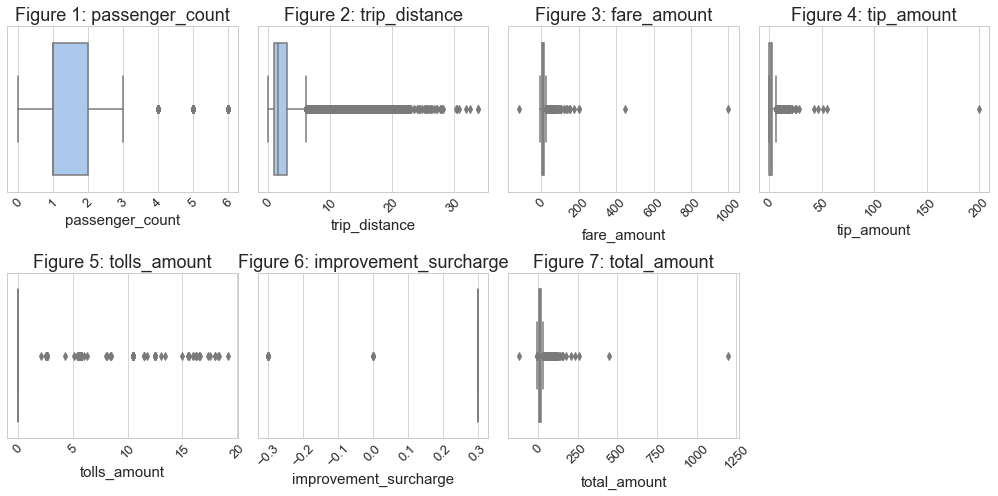

In [177]:
plot(df = data, feat_lst = num_cols, output = None, n_rows = 2, n_cols = 4, plot_type = None)

- Overall, the continuous variables contain lots of outliners. As `fare_amount` variable is the main feature for this project scope, I would remove outliners from this column to ensure the validity of the result.


- `trip_distance`, `fare_amount`, and `passenger_count` with values less or equal 0 also need to be removed from the dataset

In [178]:
# Data Cleaning : handle zero and negative values
data['passenger_count'] = data.loc[data['passenger_count'] > 0]['passenger_count']
data['trip_distance'] = data.loc[data['trip_distance'] > 0]['trip_distance']
data['fare_amount'] = data.loc[data['fare_amount'] > 0]['fare_amount']
data['total_amount'] = data.loc[data['total_amount'] > 0]['total_amount']

data.dropna(axis = 0, inplace = True)
data.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [179]:
# Determine outliners by IQR
Q3 = data['total_amount'].quantile(0.75)
Q1 = data['total_amount'].quantile(0.25)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
outliner_index = data.loc[(data['total_amount'] < lower) | (data['total_amount'] > upper)].index
print('Number of outliners:', len(outliner_index))

Number of outliners: 2041


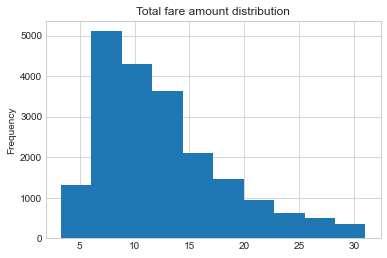

In [180]:
# remove outliners
data.drop(index = outliner_index, inplace = True)

# show feature distribution after removing outliners
data['total_amount'].plot.hist()
plt.title('Total fare amount distribution')
plt.show();

In [181]:
# checking data size after removing outliners
data.shape

(20363, 18)

## 2. Identify relationship
- Is there a relationship between `total_amount` and `payment_type`?
- What is the average total fare amount in each payment type?

In [182]:
# Discover the relationship between "fare_amount" and "payment_type"

# calculate mean and standard deviation between different groups of payment_type
mean = data.groupby('payment_type')['total_amount'].mean()
std = data.groupby('payment_type')['total_amount'].std()

display(mean, std)

payment_type
1    13.367280
2    11.048171
3    10.700125
4    12.224375
Name: total_amount, dtype: float64

payment_type
1    5.662625
2    5.438138
3    6.569687
4    7.136203
Name: total_amount, dtype: float64

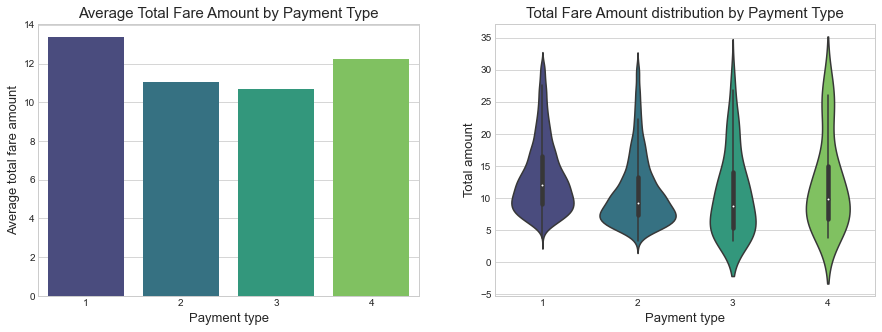

In [183]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.barplot(mean.index, mean.values, palette = 'viridis')
plt.xlabel('Payment type', fontsize = 13)
plt.ylabel('Average total fare amount', fontsize = 13)
plt.title('Average Total Fare Amount by Payment Type', fontsize = 15)
plt.subplot(1, 2, 2)
sns.violinplot(data['payment_type'], data['total_amount'], palette = 'viridis')
plt.xlabel('Payment type', fontsize = 13)
plt.ylabel('Total amount', fontsize = 13)
plt.title('Total Fare Amount distribution by Payment Type', fontsize = 15)
plt.show();

There's a variation in average `total_amount` across groups of `payment_type`, and each group distribution seems to have slight difference. However, the difference is not substantial indicating the relationship between `payment_type` and `total_amount` is just moderate.

On the other hand, based on the average values between group 1 (*customers who paid in credit card*) and group 2 (*customers who paid in cash*), it appears that customers from group 1 tend to pay a larger total fare amount than customers from group 2. However, this difference might arise from random sampling, so in order to assess whether the difference is statistically significant, I conduct a hypothesis test.

In [184]:
# calculate pearson correlation between fare_amount and payment_type
corr = data[['total_amount', 'payment_type']].corr(method = 'pearson').iloc[-1, 0]
print('Pearson correlation between fare_amount and payment_type:', corr)

Pearson correlation between fare_amount and payment_type: -0.1870382973436317


Pearson correlation score equals $-0.187$ confirm again that the relationship between `fare_amount` and `payment_type` is weak and not substantial.

# PACE: Construct stage
---
- How to perform A/B testing?
- How to assure the A/B result is valid and not biased?

## Procedure for performing A/B test and assuring validity of result


1. **Problem Statement** - *What is the goal of the experiment?*
    
    Finding ways to generate more revenue for taxi cab drivers by discovering if customers spend higher when paying in credit card compared to cash. From the hypothesis testing result, the business can develope strategy to encourage customers to pay with credit cards, which will likely generate more revenue for taxi cab drivers.
    
    The metric used for assessing if customers spend higher with credit card payment type compared to cash payemnt type is the `total_amount` (The time-and-distance fare calculated by the meter) per day per trip.
    
    - Control group : the average total fare amount per day per trip from customers who paid in cash $(\mu_{c})$
    - Treatment group : the average total fare amount per day per trip from customers who paid in credit card $(\mu_{t})$

2. **Define Hypothesis** - *What result do you hypothesize from the experiment?*
    
    - $H_0 : \mu_{c} = \mu_{t}$
    
    There is no difference in average total fare amount between customers paid with cash and ones paid with credit card.
    - $H_0 : \mu_{c} \not= \mu_{t}$
    
    There is significant difference in average total fare amount between customers paid with cash and ones paid with credit card.
    
3. **Design the Experiment** - *What are your experiment parameters?*
    
    - Determine sample size by formula: $(n = \frac {16\sigma^2} {\delta^2})$. where $\sigma$ is the population standard deviation, and $\delta$ is the smallest meaningful difference between the control and treatment group. The formula has assumptions that the significant level is $0.05$ and the statistical power is $0.8$. 
    
    - In the scope of this project, I assume that the difference of $\$2$ per trip between control and treatment group will be significant enough to launch future marketing projects for promoting credit card payment. The population standard deviation $\sigma = 10$ is assumed in order to calculate the sample size.
    
    - Based on the above assumptions, the sample size needed for conducting A/B test is: $n = \frac {16*(10)^2} {(2)^2} = 400$ for each group.
    
4. **Run the Experiment** - *What are the requirements for running an experiment?*
    
    Instruments and data pipelines are set up to collect data. For the purpose of this project, assume that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 

    1.  customers who are required to pay with cash
    2.  customers who are required to pay with credit card
    
    Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

5. **Validity Checks** - *Did the experiment run soundly without errors or bias?*


6. **Inteprete Results** - *In which direction is the metric significant statistically and practically?*


7. **Launch Decision** - *Based on the results and trade-offs, should the change launch?*

In [185]:
# extract credit and cash group from original data
credit = data[data['payment_type'] == 1]['total_amount']
cash = data[data['payment_type'] == 2]['total_amount']

# sampling based on the calculated sample size of 400
t_group = credit.sample(n = 400, replace = True, random_state = 1)
c_group = cash.sample(n = 400, replace = True, random_state = 1)

In [186]:
# conduct the hypothesis
from scipy import stats
t, p = stats.ttest_ind(a = t_group, b = c_group, equal_var = False)
print('T-score:', t)
print('P-value:', p)

# conclude the hypothesis
if p < 0.05:
    print("\nP-value < 0.05, reject H_0, there's a significant difference in average total fare amount between customers who paid in credit card and customers who paid in cash")
else:
    print("\nP-value > 0.05, fail to reject H_0, there's no significant difference in average total fare amount between customers who paid in credit card and customers who paid in cash")

T-score: 6.735824687046151
P-value: 3.120675999156806e-11

P-value < 0.05, reject H_0, there's a significant difference in average total fare amount between customers who paid in credit card and customers who paid in cash


# PACE: Execute stage
---
- What business insight(s) can be drawn from the result of the A/B test?
- What recommendations can be suggestd?
- How this hypothesis test is biased given the assumptions in the test?

## Insight Interpretation

The calculated p-value is less than 0.05, it means that the probability of observing a difference in the average total fare amount between the cash and credit card groups is significant and not by chance alone. Therefore, I reject the null hypothesis and conclude that there is a significant difference in the average total fare amount between customers who paid with cash and those who paid with credit card.

The A/B result provides insights into whether credit card payment can lead to higher revenue for taxi cab drivers. It's statistically significant is that customers who pay with credit card (treatment group) tend to spend more on taxi fares compared to those who pay with cash (control group). This may be due to the fact that paying with credit card is more convenient for customers, or that they feel more comfortable spending more when they don't have to physically hand over cash. Alternatively, it may be due to the fact that credit card users are more likely to be from higher income brackets and are therefore more willing and able to spend more on taxi fares. This can provide the basis for developing strategies to encourage more credit card payments and increase revenue.

**The key business insight is that encouraging customers to pay with credit cards will likely generate more revenue for taxi cab drivers.**

## Recommendations

Based on this result, the business can develop strategies to encourage more customers to pay with credit cards. For example, they can offer discounts or incentives for credit card payments, advertise the benefits of paying with credit cards, and work on improving the payment system to make it more convenient for customers to pay with credit cards.

## Analysis Drawbacks

**Note: Given the assumptions, follwing factors need to be ajusted for the result to be valid and practical:**

- The sample size of 400 was calculated based on assumptions about the population standard deviation and cusomters are randomly selected and divided into two groups. However, in reality, the population variance need to be based on previous research or A/B test, A/A test, further more, there may be factors that influence whether a customer pay with cash or credit card, such as age, income, or location. Failure to account for these factors could introduce bias into the results.


- The experiment uses data come from a single city (New York). In reality, geographic difference may affects ho customers pay for taxi rides and how much they spend.


- This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that total fare amount determines payment type, rather than vice versa.